# **Imports**

In [ ]:
# Mount Google Drive containing Project Data
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# **Explanatory Variables: Daily Weather Data (Available: 2010-2019 | Used: 2010-2014)**

In [ ]:
# start reading from 2010-02 because 2010-01 file downloaded from data.gouv.fr has an encoding error

df = pd.read_csv("/content/drive/My Drive/Project Data/datasetMeteo/synop.201002.csv",sep=';')
for month in ["03","04","05","06","07","08","09","10","11","12"]:
    filename = "/content/drive/My Drive/Project Data/datasetMeteo/synop.2010"+month+".csv"
    dftest = pd.read_csv(filename,sep=';')
    df = pd.concat([df,dftest])

dfinit2011 = pd.read_csv("/content/drive/My Drive/Project Data/datasetMeteo/synop.201101.csv",sep=';')
df = pd.concat([df,dfinit2011])
for month in ["02","03","04","05","06","07","08","09","10","11","12"]:
    filename = "/content/drive/My Drive/Project Data/datasetMeteo/synop.2011"+month+".csv"
    dftest = pd.read_csv(filename,sep=';')
    df = pd.concat([df,dftest])

dfinit2012 = pd.read_csv("/content/drive/My Drive/Project Data/datasetMeteo/synop.201201.csv",sep=';')
df = pd.concat([df,dfinit2012]);
for month in ["02","03","04","05","06","07","08","09","10","11","12"]:
    filename = "/content/drive/My Drive/Project Data/datasetMeteo/synop.2012"+month+".csv"
    dftest = pd.read_csv(filename,sep=';')
    df = pd.concat([df,dftest])

dfinit2013 = pd.read_csv("/content/drive/My Drive/Project Data/datasetMeteo/synop.201301.csv",sep=';')
df = pd.concat([df,dfinit2013]);
for month in ["02","03","04","05","06","07","08","09","10","11","12"]:
    filename = "/content/drive/My Drive/Project Data/datasetMeteo/synop.2013"+month+".csv"
    dftest = pd.read_csv(filename,sep=';')
    df = pd.concat([df,dftest])

dfinit2014 = pd.read_csv("/content/drive/My Drive/Project Data/datasetMeteo/synop.201401.csv",sep=';')
df = pd.concat([df,dfinit2014]);
for month in ["02","03","04","05","06","07","08","09","10","11","12"]:
    filename = "/content/drive/My Drive/Project Data/datasetMeteo/synop.2014"+month+".csv"
    dftest = pd.read_csv(filename,sep=';')
    df = pd.concat([df,dftest]) 

In [ ]:
df

,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,vv,ww,w1,w2,n,nbas,hbas,cl,cm,ch,pres,niv_bar,geop,tend24,tn12,tn24,tx12,tx24,tminsol,sw,tw,raf10,rafper,per,etat_sol,ht_neige,ssfrai,perssfrai,rr1,rr3,rr6,rr12,rr24,phenspe1,phenspe2,phenspe3,phenspe4,nnuage1,ctype1,hnuage1,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4,Unnamed: 59
0,7005,20100201000000,100910,-10,8,220,3.100000,273.350000,273.050000,98,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,99950,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,6.200000,-10,mq,mq,mq,mq,1.000000,6.000000,6.000000,mq,mq,710.000000,1106.000000,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
1,7015,20100201000000,100800,20,0,250,5.100000,273.150000,272.150000,93,30000,2,1,1,50,3,800,35,20,11,100210,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,7.200000,-10,11,mq,0.000000,-60,0.000000,0.000000,0.000000,mq,mq,710.000000,1107.000000,3100.000000,mq,3,6,750,3,0,6000,mq,mq,mq,mq,mq,mq,NaN
2,7027,20100201000000,101150,70,1,250,6.200000,274.050000,273.350000,95,45000,0,mq,mq,mq,mq,1250,mq,mq,mq,100310,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,8.700000,-10,mq,mq,mq,mq,0.000000,0.000000,0.000000,mq,mq,710.000000,1109.000000,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
3,7037,20100201000000,101080,30,1,240,3.600000,272.050000,272.050000,100,10000,0,mq,mq,mq,mq,450,mq,mq,mq,99180,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,6.200000,-10,mq,mq,mq,mq,0.000000,0.000000,0.000000,mq,mq,710.000000,1106.000000,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
4,7110,20100201000000,101470,190,1,240,1.500000,272.150000,271.750000,97,7000,1,8,7,25,2,800,35,20,10,100270,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,3.100000,-10,mq,mq,mq,mq,0.000000,0.200000,0.400000,mq,mq,710.000000,1103.000000,mq,mq,2,6,900,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14423,78925,20141231210000,101690,30,3,80,6.600000,300.850000,294.850000,70,38560,mq,mq,mq,mq,mq,mq,mq,mq,mq,101600,mq,mq,-10,mq,mq,mq,mq,mq,mq,mq,10.100000,10.900000,-10,mq,mq,mq,mq,0.000000,0.000000,0.800000,0.800000,8.000000,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
14424,81401,20141231210000,101220,10,5,60,1.600000,299.650000,296.150000,81,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,101160,mq,mq,-60,mq,mq,mq,mq,mq,mq,mq,3.800000,5.000000,-10,mq,mq,mq,mq,0.000000,0.200000,0.200000,0.200000,0.200000,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
14425,81405,20141231210000,101250,10,3,60,4.900000,300.350000,295.350000,74,24560,0,mq,mq,100,1,800,mq,mq,mq,101160,mq,mq,-70,mq,mq,mq,mq,297.250000,mq,mq,6.900000,8.400000,-10,mq,mq,mq,mq,0.000000,0.000000,-0.100000,0.800000,0.800000,mq,mq,mq,mq,1,mq,720,4,mq,2160,8,mq,5340,mq,mq,mq,NaN
14426,81408,20141231210000,101190,30,3,50,2.600000,300.050000,295.050000,74,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,101110,mq,mq,-110,mq,mq,mq,mq,mq,mq,mq,4.300000,7.100000,-10,mq,mq,mq,mq,0.000000,0.000000,0.000000,0.000000,0.000000,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN


In [ ]:
df.date.min()

20100201000000

In [ ]:
df.date.max()

20141231210000

## ***Data cleaning and preparation***

In [ ]:
df.duplicated().sum()

16

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
# selecting fields based on data availability and relevance
df1 = df.filter(["date","pmer","t","td","u","vv","n","hbas","pres"],axis=1)
df1

,date,pmer,t,td,u,vv,n,hbas,pres
0,20100201000000,100910,273.350000,273.050000,98,mq,mq,mq,99950
1,20100201000000,100800,273.150000,272.150000,93,30000,50,800,100210
2,20100201000000,101150,274.050000,273.350000,95,45000,mq,1250,100310
3,20100201000000,101080,272.050000,272.050000,100,10000,mq,450,99180
4,20100201000000,101470,272.150000,271.750000,97,7000,25,800,100270
...,...,...,...,...,...,...,...,...,...
14423,20141231210000,101690,300.850000,294.850000,70,38560,mq,mq,101600
14424,20141231210000,101220,299.650000,296.150000,81,mq,mq,mq,101160
14425,20141231210000,101250,300.350000,295.350000,74,24560,100,800,101160
14426,20141231210000,101190,300.050000,295.050000,74,mq,mq,mq,101110


In [ ]:
df1.replace({"mq": 0},inplace=True)
df1

,date,pmer,t,td,u,vv,n,hbas,pres
0,20100201000000,100910,273.350000,273.050000,98,0,0,0,99950
1,20100201000000,100800,273.150000,272.150000,93,30000,50,800,100210
2,20100201000000,101150,274.050000,273.350000,95,45000,0,1250,100310
3,20100201000000,101080,272.050000,272.050000,100,10000,0,450,99180
4,20100201000000,101470,272.150000,271.750000,97,7000,25,800,100270
...,...,...,...,...,...,...,...,...,...
14423,20141231210000,101690,300.850000,294.850000,70,38560,0,0,101600
14424,20141231210000,101220,299.650000,296.150000,81,0,0,0,101160
14425,20141231210000,101250,300.350000,295.350000,74,24560,100,800,101160
14426,20141231210000,101190,300.050000,295.050000,74,0,0,0,101110


In [ ]:
# change types from object
df1['pmer'] = df1.pmer.astype('int')
df1['t'] = df1.t.astype('float')
df1['td'] = df1.td.astype('float')
df1['u'] = df1.u.astype('int')
df1['vv'] = df1.vv.astype('int')
df1['n'] = df1.n.astype('int')
df1['hbas'] = df1.hbas.astype('int')
df1['pres'] = df1.pres.astype('int')

In [ ]:
# fill missing data
df1.pmer.replace(0,df1.pmer.mean(),inplace=True)
df1.t.replace(0,df1.t.mean(),inplace=True)
df1.td.replace(0,df1.td.mean(),inplace=True)
df1.u.replace(0,df1.u.mean(),inplace=True)
df1.vv.replace(0,df1.vv.mean(),inplace=True)
df1.n.replace(0,df1.n.mean(),inplace=True)
df1.hbas.replace(0,df1.hbas.mean(),inplace=True)
df1.pres.replace(0,df1.pres.mean(),inplace=True)

In [ ]:
df1

,date,pmer,t,td,u,vv,n,hbas,pres
0,20100201000000,100910.0,273.35,273.05,98.0,18082.150806,41.121125,835.517381,99950.0
1,20100201000000,100800.0,273.15,272.15,93.0,30000.000000,50.000000,800.000000,100210.0
2,20100201000000,101150.0,274.05,273.35,95.0,45000.000000,41.121125,1250.000000,100310.0
3,20100201000000,101080.0,272.05,272.05,100.0,10000.000000,41.121125,450.000000,99180.0
4,20100201000000,101470.0,272.15,271.75,97.0,7000.000000,25.000000,800.000000,100270.0
...,...,...,...,...,...,...,...,...,...
14423,20141231210000,101690.0,300.85,294.85,70.0,38560.000000,41.121125,835.517381,101600.0
14424,20141231210000,101220.0,299.65,296.15,81.0,18082.150806,41.121125,835.517381,101160.0
14425,20141231210000,101250.0,300.35,295.35,74.0,24560.000000,100.000000,800.000000,101160.0
14426,20141231210000,101190.0,300.05,295.05,74.0,18082.150806,41.121125,835.517381,101110.0


In [ ]:
df1['date'] = df1.date.astype('str')
df1['date'] = df1['date'].str.slice(0,8)
df1

,date,pmer,t,td,u,vv,n,hbas,pres
0,20100201,100910.0,273.35,273.05,98.0,18082.150806,41.121125,835.517381,99950.0
1,20100201,100800.0,273.15,272.15,93.0,30000.000000,50.000000,800.000000,100210.0
2,20100201,101150.0,274.05,273.35,95.0,45000.000000,41.121125,1250.000000,100310.0
3,20100201,101080.0,272.05,272.05,100.0,10000.000000,41.121125,450.000000,99180.0
4,20100201,101470.0,272.15,271.75,97.0,7000.000000,25.000000,800.000000,100270.0
...,...,...,...,...,...,...,...,...,...
14423,20141231,101690.0,300.85,294.85,70.0,38560.000000,41.121125,835.517381,101600.0
14424,20141231,101220.0,299.65,296.15,81.0,18082.150806,41.121125,835.517381,101160.0
14425,20141231,101250.0,300.35,295.35,74.0,24560.000000,100.000000,800.000000,101160.0
14426,20141231,101190.0,300.05,295.05,74.0,18082.150806,41.121125,835.517381,101110.0


In [ ]:
df1['date'] =  pd.to_datetime(df1['date'], format='%Y%m%d')
df1

,date,pmer,t,td,u,vv,n,hbas,pres
0,2010-02-01,100910.0,273.35,273.05,98.0,18082.150806,41.121125,835.517381,99950.0
1,2010-02-01,100800.0,273.15,272.15,93.0,30000.000000,50.000000,800.000000,100210.0
2,2010-02-01,101150.0,274.05,273.35,95.0,45000.000000,41.121125,1250.000000,100310.0
3,2010-02-01,101080.0,272.05,272.05,100.0,10000.000000,41.121125,450.000000,99180.0
4,2010-02-01,101470.0,272.15,271.75,97.0,7000.000000,25.000000,800.000000,100270.0
...,...,...,...,...,...,...,...,...,...
14423,2014-12-31,101690.0,300.85,294.85,70.0,38560.000000,41.121125,835.517381,101600.0
14424,2014-12-31,101220.0,299.65,296.15,81.0,18082.150806,41.121125,835.517381,101160.0
14425,2014-12-31,101250.0,300.35,295.35,74.0,24560.000000,100.000000,800.000000,101160.0
14426,2014-12-31,101190.0,300.05,295.05,74.0,18082.150806,41.121125,835.517381,101110.0


In [ ]:
# group weather data by date
groups = df1.groupby(['date'])
groups.ngroups

1795

In [ ]:
groups.count()

,pmer,t,td,u,vv,n,hbas,pres
date,,,,,,,,
2010-02-01,463,463,463,463,463,463,463,463
2010-02-02,469,469,469,469,469,469,469,469
2010-02-03,470,470,470,470,470,470,470,470
2010-02-04,467,467,467,467,467,467,467,467
2010-02-05,451,451,451,451,451,451,451,451
...,...,...,...,...,...,...,...,...
2014-12-27,472,472,472,472,472,472,472,472
2014-12-28,472,472,472,472,472,472,472,472
2014-12-29,472,472,472,472,472,472,472,472


In [ ]:
# transform data for groups
collapsed_pmer = groups['pmer'].transform(lambda x: x.mean())
collapsed_t = groups['t'].transform(lambda x: x.mean())
collapsed_td = groups['td'].transform(lambda x: x.mean())
collapsed_u = groups['u'].transform(lambda x: x.mean())
collapsed_vv = groups['vv'].transform(lambda x: x.mean())
collapsed_n = groups['n'].transform(lambda x: x.mean())
collapsed_hbas = groups['hbas'].transform(lambda x: x.mean())
collapsed_pres = groups['pres'].transform(lambda x: x.mean())

In [ ]:
# apply transformation
df1['pmer'] = collapsed_pmer
df1['t'] = collapsed_t
df1['td'] = collapsed_td
df1['u'] = collapsed_u
df1['vv'] = collapsed_vv
df1['n'] = collapsed_n
df1['hbas'] = collapsed_hbas
df1['pres'] = collapsed_pres

In [ ]:
df1

,date,pmer,t,td,u,vv,n,hbas,pres
0,2010-02-01,101320.209989,280.141793,275.603518,76.085582,22270.836834,52.618720,1149.621716,97146.749655
1,2010-02-01,101320.209989,280.141793,275.603518,76.085582,22270.836834,52.618720,1149.621716,97146.749655
2,2010-02-01,101320.209989,280.141793,275.603518,76.085582,22270.836834,52.618720,1149.621716,97146.749655
3,2010-02-01,101320.209989,280.141793,275.603518,76.085582,22270.836834,52.618720,1149.621716,97146.749655
4,2010-02-01,101320.209989,280.141793,275.603518,76.085582,22270.836834,52.618720,1149.621716,97146.749655
...,...,...,...,...,...,...,...,...,...
14423,2014-12-31,102470.443615,279.970991,275.125256,75.872036,18948.857812,54.128144,845.289964,100842.272472
14424,2014-12-31,102470.443615,279.970991,275.125256,75.872036,18948.857812,54.128144,845.289964,100842.272472
14425,2014-12-31,102470.443615,279.970991,275.125256,75.872036,18948.857812,54.128144,845.289964,100842.272472
14426,2014-12-31,102470.443615,279.970991,275.125256,75.872036,18948.857812,54.128144,845.289964,100842.272472


In [ ]:
df1.drop_duplicates(subset=['date'],inplace=True)
df1

,date,pmer,t,td,u,vv,n,hbas,pres
0,2010-02-01,101320.209989,280.141793,275.603518,76.085582,22270.836834,52.618720,1149.621716,97146.749655
463,2010-02-02,101430.612420,281.953198,277.967226,78.952291,22198.928473,61.713474,1336.131219,97417.469694
932,2010-02-03,101258.850110,283.350934,279.398992,79.076495,21906.286511,58.777332,1367.929626,97254.794227
1402,2010-02-04,100944.340953,283.754069,279.933253,79.369646,20702.686639,67.534131,1560.984327,97125.372291
1869,2010-02-05,100662.554053,284.719488,281.518234,83.049403,20344.664981,63.784016,901.901568,96727.274197
...,...,...,...,...,...,...,...,...,...
12081,2014-12-27,100894.503893,283.464703,279.318049,79.037340,24587.239897,68.485127,831.517519,99246.068701
12553,2014-12-28,101381.219995,280.597119,275.501947,73.800052,26788.420183,57.090599,832.819389,99684.924633
13025,2014-12-29,102568.825927,279.041610,273.443684,71.825476,23517.777074,51.376801,842.075672,100924.755142
13497,2014-12-30,102671.130972,279.970512,275.473483,77.151933,18157.618574,55.512373,829.443385,101028.086146


## ***Visualize the data***

In [ ]:
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
%matplotlib inline

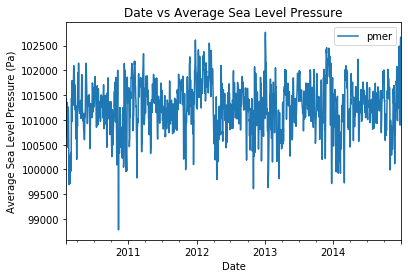

In [ ]:
df1.plot(x='date', y='pmer')  
plt.title('Date vs Average Sea Level Pressure')  
plt.xlabel('Date')  
plt.ylabel('Average Sea Level Pressure (Pa)')  
plt.show()

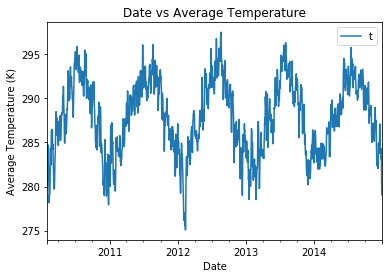

In [ ]:
df1.plot(x='date', y='t')  
plt.title('Date vs Average Temperature')  
plt.xlabel('Date')  
plt.ylabel('Average Temperature (K)')  
plt.show()

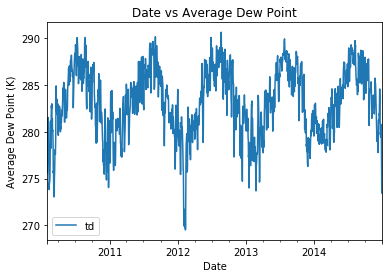

In [ ]:
df1.plot(x='date', y='td')  
plt.title('Date vs Average Dew Point')  
plt.xlabel('Date')  
plt.ylabel('Average Dew Point (K)')  
plt.show()

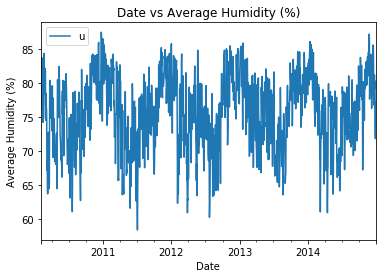

In [ ]:
df1.plot(x='date', y='u')  
plt.title('Date vs Average Humidity (%)')  
plt.xlabel('Date')  
plt.ylabel('Average Humidity (%)')  
plt.show()

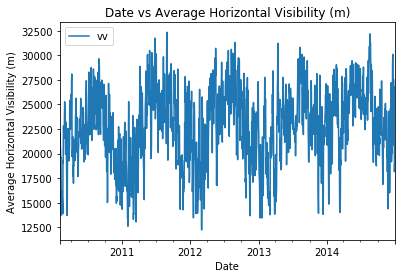

In [ ]:
df1.plot(x='date', y='vv')  
plt.title('Date vs Average Horizontal Visibility (m)')  
plt.xlabel('Date')  
plt.ylabel('Average Horizontal Visibility (m)')  
plt.show()

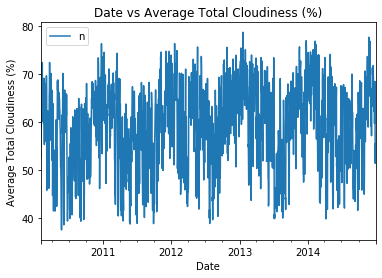

In [ ]:
df1.plot(x='date', y='n')  
plt.title('Date vs Average Total Cloudiness (%)')  
plt.xlabel('Date')  
plt.ylabel('Average Total Cloudiness (%)')  
plt.show()

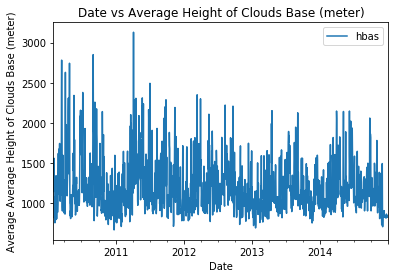

In [ ]:
df1.plot(x='date', y='hbas')  
plt.title('Date vs Average Height of Clouds Base (meter)')  
plt.xlabel('Date')  
plt.ylabel('Average Average Height of Clouds Base (meter)')  
plt.show()

# **Variable to Explain: Monthly Interventions Data (Available: 2007-2014)**

In [ ]:
interventions = pd.read_csv("/content/drive/My Drive/Project Data/CG71SdisInterventions.csv",sep=';',encoding='utf-16be')

In [ ]:
a = interventions
a

,ANNEE_MOIS,INSEE,COMMUNE,SAP,AVP,INC,OD
0,2014-8,71003,ALLEREY SUR SAONE,NaN,NaN,NaN,2.0
1,2014-8,71005,ALUZE,1.0,NaN,NaN,NaN
2,2014-8,71008,ANGLURE SOUS DUN,1.0,NaN,NaN,NaN
3,2014-8,71009,ANOST,7.0,NaN,NaN,1.0
4,2014-8,71010,ANTULLY,1.0,NaN,1.0,1.0
...,...,...,...,...,...,...,...
35737,2007-1,71580,VINCELLES,1.0,NaN,NaN,NaN
35738,2007-1,71583,VINZELLES,2.0,NaN,NaN,NaN
35739,2007-1,71585,VIREY LE GRAND,2.0,NaN,NaN,NaN
35740,2007-1,71588,VITRY EN CHAROLLAIS,3.0,1.0,NaN,1.0


In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35742 entries, 0 to 35741
Data columns (total 7 columns):
ANNEE_MOIS    35742 non-null object
INSEE         35742 non-null int64
COMMUNE       35742 non-null object
SAP           28588 non-null float64
AVP           11285 non-null float64
INC           10770 non-null float64
OD            10069 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.9+ MB


In [ ]:
a.describe()

,INSEE,SAP,AVP,INC,OD
count,35742.000000,28588.000000,11285.000000,10770.000000,10069.000000
mean,69303.513346,4.942039,1.771201,2.023770,3.009038
std,16024.052131,15.412052,2.072320,3.766885,6.539284
min,1016.000000,1.000000,1.000000,1.000000,1.000000
25%,71133.000000,1.000000,1.000000,1.000000,1.000000
50%,71281.500000,2.000000,1.000000,1.000000,1.000000
75%,71433.000000,3.000000,2.000000,2.000000,2.000000
max,580850.000000,269.000000,29.000000,51.000000,206.000000


## ***Data cleaning and preparation***

In [ ]:
a.fillna(0,inplace=True)
a

,ANNEE_MOIS,INSEE,COMMUNE,SAP,AVP,INC,OD
0,2014-8,71003,ALLEREY SUR SAONE,0.0,0.0,0.0,2.0
1,2014-8,71005,ALUZE,1.0,0.0,0.0,0.0
2,2014-8,71008,ANGLURE SOUS DUN,1.0,0.0,0.0,0.0
3,2014-8,71009,ANOST,7.0,0.0,0.0,1.0
4,2014-8,71010,ANTULLY,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...
35737,2007-1,71580,VINCELLES,1.0,0.0,0.0,0.0
35738,2007-1,71583,VINZELLES,2.0,0.0,0.0,0.0
35739,2007-1,71585,VIREY LE GRAND,2.0,0.0,0.0,0.0
35740,2007-1,71588,VITRY EN CHAROLLAIS,3.0,1.0,0.0,1.0


In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35742 entries, 0 to 35741
Data columns (total 7 columns):
ANNEE_MOIS    35742 non-null object
INSEE         35742 non-null int64
COMMUNE       35742 non-null object
SAP           35742 non-null float64
AVP           35742 non-null float64
INC           35742 non-null float64
OD            35742 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.9+ MB


In [ ]:
groups = a.groupby(['ANNEE_MOIS'])
groups.ngroups

92

In [ ]:
groups.count()

,INSEE,COMMUNE,SAP,AVP,INC,OD
ANNEE_MOIS,,,,,,
2007-1,370,370,370,370,370,370
2007-10,346,346,346,346,346,346
2007-11,328,328,328,328,328,328
2007-12,384,384,384,384,384,384
2007-2,326,326,326,326,326,326
...,...,...,...,...,...,...
2014-4,410,410,410,410,410,410
2014-5,416,416,416,416,416,416
2014-6,444,444,444,444,444,444


In [ ]:
collapsed_sap = groups['SAP'].transform(lambda x: x.sum())
collapsed_avp = groups['AVP'].transform(lambda x: x.sum())
collapsed_inc = groups['INC'].transform(lambda x: x.sum())
collapsed_od = groups['OD'].transform(lambda x: x.sum())

In [ ]:
# apply transformation
a['SAP'] = collapsed_sap
a['AVP'] = collapsed_avp
a['INC'] = collapsed_inc
a['OD'] = collapsed_od

In [ ]:
a

,ANNEE_MOIS,INSEE,COMMUNE,SAP,AVP,INC,OD
0,2014-8,71003,ALLEREY SUR SAONE,1857.0,189.0,192.0,447.0
1,2014-8,71005,ALUZE,1857.0,189.0,192.0,447.0
2,2014-8,71008,ANGLURE SOUS DUN,1857.0,189.0,192.0,447.0
3,2014-8,71009,ANOST,1857.0,189.0,192.0,447.0
4,2014-8,71010,ANTULLY,1857.0,189.0,192.0,447.0
...,...,...,...,...,...,...,...
35737,2007-1,71580,VINCELLES,1497.0,191.0,241.0,218.0
35738,2007-1,71583,VINZELLES,1497.0,191.0,241.0,218.0
35739,2007-1,71585,VIREY LE GRAND,1497.0,191.0,241.0,218.0
35740,2007-1,71588,VITRY EN CHAROLLAIS,1497.0,191.0,241.0,218.0


In [ ]:
a.drop_duplicates(subset=['ANNEE_MOIS'], inplace=True)
a

,ANNEE_MOIS,INSEE,COMMUNE,SAP,AVP,INC,OD
0,2014-8,71003,ALLEREY SUR SAONE,1857.0,189.0,192.0,447.0
423,2014-7,71003,ALLEREY SUR SAONE,2032.0,268.0,253.0,571.0
861,2014-6,71003,ALLEREY SUR SAONE,1925.0,255.0,350.0,434.0
1305,2014-5,71003,ALLEREY SUR SAONE,2042.0,202.0,232.0,332.0
1721,2014-4,71003,ALLEREY SUR SAONE,1882.0,184.0,288.0,212.0
...,...,...,...,...,...,...,...
33988,2007-2,71003,ALLEREY SUR SAONE,1215.0,179.0,200.0,136.0
34314,2007-12,71004,ALLERIOT,1451.0,264.0,294.0,207.0
34698,2007-11,71004,ALLERIOT,1167.0,258.0,229.0,160.0
35026,2007-10,71003,ALLEREY SUR SAONE,1249.0,238.0,231.0,200.0


In [ ]:
a['ANNEE_MOIS'] = pd.to_datetime(a['ANNEE_MOIS'], format='%Y-%m')
a

,ANNEE_MOIS,INSEE,COMMUNE,SAP,AVP,INC,OD
0,2014-08-01,71003,ALLEREY SUR SAONE,1857.0,189.0,192.0,447.0
423,2014-07-01,71003,ALLEREY SUR SAONE,2032.0,268.0,253.0,571.0
861,2014-06-01,71003,ALLEREY SUR SAONE,1925.0,255.0,350.0,434.0
1305,2014-05-01,71003,ALLEREY SUR SAONE,2042.0,202.0,232.0,332.0
1721,2014-04-01,71003,ALLEREY SUR SAONE,1882.0,184.0,288.0,212.0
...,...,...,...,...,...,...,...
33988,2007-02-01,71003,ALLEREY SUR SAONE,1215.0,179.0,200.0,136.0
34314,2007-12-01,71004,ALLERIOT,1451.0,264.0,294.0,207.0
34698,2007-11-01,71004,ALLERIOT,1167.0,258.0,229.0,160.0
35026,2007-10-01,71003,ALLEREY SUR SAONE,1249.0,238.0,231.0,200.0


In [ ]:
a.sort_values("ANNEE_MOIS",ascending=True,inplace=True)
a

,ANNEE_MOIS,INSEE,COMMUNE,SAP,AVP,INC,OD
35372,2007-01-01,71004,ALLERIOT,1497.0,191.0,241.0,218.0
33988,2007-02-01,71003,ALLEREY SUR SAONE,1215.0,179.0,200.0,136.0
33617,2007-03-01,71003,ALLEREY SUR SAONE,1338.0,217.0,242.0,193.0
33238,2007-04-01,71003,ALLEREY SUR SAONE,1443.0,259.0,247.0,379.0
32849,2007-05-01,71003,ALLEREY SUR SAONE,1393.0,239.0,252.0,444.0
...,...,...,...,...,...,...,...
1721,2014-04-01,71003,ALLEREY SUR SAONE,1882.0,184.0,288.0,212.0
1305,2014-05-01,71003,ALLEREY SUR SAONE,2042.0,202.0,232.0,332.0
861,2014-06-01,71003,ALLEREY SUR SAONE,1925.0,255.0,350.0,434.0
423,2014-07-01,71003,ALLEREY SUR SAONE,2032.0,268.0,253.0,571.0


In [ ]:
a.drop(['INSEE', 'COMMUNE'], axis=1, inplace=True)
a

,ANNEE_MOIS,SAP,AVP,INC,OD
35372,2007-01-01,1497.0,191.0,241.0,218.0
33988,2007-02-01,1215.0,179.0,200.0,136.0
33617,2007-03-01,1338.0,217.0,242.0,193.0
33238,2007-04-01,1443.0,259.0,247.0,379.0
32849,2007-05-01,1393.0,239.0,252.0,444.0
...,...,...,...,...,...
1721,2014-04-01,1882.0,184.0,288.0,212.0
1305,2014-05-01,2042.0,202.0,232.0,332.0
861,2014-06-01,1925.0,255.0,350.0,434.0
423,2014-07-01,2032.0,268.0,253.0,571.0


## ***Detecting a potential outlier at the intervention level, and correcting the file***



In [ ]:
from scipy import stats
def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh, result_type='reduce') \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)

In [ ]:
drop_numerical_outliers(a, z_thresh=3)
a

,ANNEE_MOIS,SAP,AVP,INC,OD
35372,2007-01-01,1497.0,191.0,241.0,218.0
33988,2007-02-01,1215.0,179.0,200.0,136.0
33617,2007-03-01,1338.0,217.0,242.0,193.0
33238,2007-04-01,1443.0,259.0,247.0,379.0
32849,2007-05-01,1393.0,239.0,252.0,444.0
...,...,...,...,...,...
1721,2014-04-01,1882.0,184.0,288.0,212.0
1305,2014-05-01,2042.0,202.0,232.0,332.0
861,2014-06-01,1925.0,255.0,350.0,434.0
423,2014-07-01,2032.0,268.0,253.0,571.0


In [ ]:
a['TOTAL'] = a.SAP + a.AVP + a.INC + a.OD
a

,ANNEE_MOIS,SAP,AVP,INC,OD,TOTAL
35372,2007-01-01,1497.0,191.0,241.0,218.0,2147.0
33988,2007-02-01,1215.0,179.0,200.0,136.0,1730.0
33617,2007-03-01,1338.0,217.0,242.0,193.0,1990.0
33238,2007-04-01,1443.0,259.0,247.0,379.0,2328.0
32849,2007-05-01,1393.0,239.0,252.0,444.0,2328.0
...,...,...,...,...,...,...
1721,2014-04-01,1882.0,184.0,288.0,212.0,2566.0
1305,2014-05-01,2042.0,202.0,232.0,332.0,2808.0
861,2014-06-01,1925.0,255.0,350.0,434.0,2964.0
423,2014-07-01,2032.0,268.0,253.0,571.0,3124.0


## ***Visualize the data***

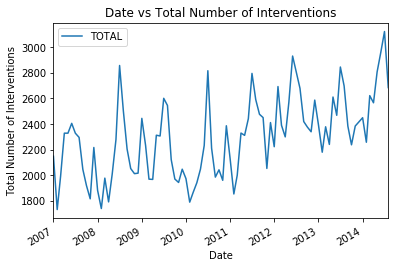

In [ ]:
a.plot(x='ANNEE_MOIS', y='TOTAL')  
plt.title('Date vs Total Number of Interventions')  
plt.xlabel('Date')  
plt.ylabel('Total Number of Interventions')  
plt.show()

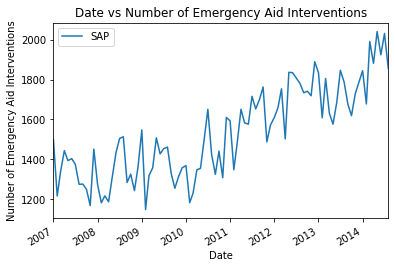

In [ ]:
a.plot(x='ANNEE_MOIS', y='SAP')  
plt.title('Date vs Number of Emergency Aid Interventions')  
plt.xlabel('Date')  
plt.ylabel('Number of Emergency Aid Interventions')  
plt.show()

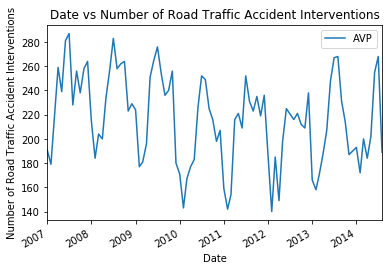

In [ ]:
a.plot(x='ANNEE_MOIS', y='AVP')  
plt.title('Date vs Number of Road Traffic Accident Interventions')  
plt.xlabel('Date')  
plt.ylabel('Number of Road Traffic Accident Interventions')  
plt.show()

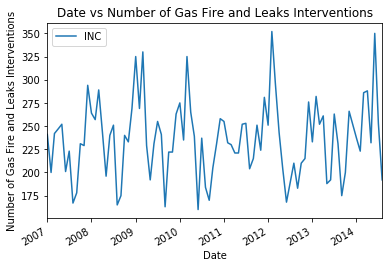

In [ ]:
a.plot(x='ANNEE_MOIS', y='INC')  
plt.title('Date vs Number of Gas Fire and Leaks Interventions')  
plt.xlabel('Date')  
plt.ylabel('Number of Gas Fire and Leaks Interventions')  
plt.show()

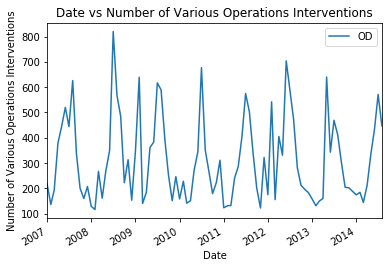

In [ ]:
a.plot(x='ANNEE_MOIS', y='OD')  
plt.title('Date vs Number of Various Operations Interventions')  
plt.xlabel('Date')  
plt.ylabel('Number of Various Operations Interventions')  
plt.show()

# **Merging Expanatory Variables and Variable to Explain (Inner Join: 2010-2014)**

In [ ]:
weather = df1.copy()
weather

,date,pmer,t,td,u,vv,n,hbas,pres
0,2010-02-01,101320.209989,280.141793,275.603518,76.085582,22270.836834,52.618720,1149.621716,97146.749655
463,2010-02-02,101430.612420,281.953198,277.967226,78.952291,22198.928473,61.713474,1336.131219,97417.469694
932,2010-02-03,101258.850110,283.350934,279.398992,79.076495,21906.286511,58.777332,1367.929626,97254.794227
1402,2010-02-04,100944.340953,283.754069,279.933253,79.369646,20702.686639,67.534131,1560.984327,97125.372291
1869,2010-02-05,100662.554053,284.719488,281.518234,83.049403,20344.664981,63.784016,901.901568,96727.274197
...,...,...,...,...,...,...,...,...,...
12081,2014-12-27,100894.503893,283.464703,279.318049,79.037340,24587.239897,68.485127,831.517519,99246.068701
12553,2014-12-28,101381.219995,280.597119,275.501947,73.800052,26788.420183,57.090599,832.819389,99684.924633
13025,2014-12-29,102568.825927,279.041610,273.443684,71.825476,23517.777074,51.376801,842.075672,100924.755142
13497,2014-12-30,102671.130972,279.970512,275.473483,77.151933,18157.618574,55.512373,829.443385,101028.086146


In [ ]:
weather.set_index("date",inplace=True)
weather

,pmer,t,td,u,vv,n,hbas,pres
date,,,,,,,,
2010-02-01,101320.209989,280.141793,275.603518,76.085582,22270.836834,52.618720,1149.621716,97146.749655
2010-02-02,101430.612420,281.953198,277.967226,78.952291,22198.928473,61.713474,1336.131219,97417.469694
2010-02-03,101258.850110,283.350934,279.398992,79.076495,21906.286511,58.777332,1367.929626,97254.794227
2010-02-04,100944.340953,283.754069,279.933253,79.369646,20702.686639,67.534131,1560.984327,97125.372291
2010-02-05,100662.554053,284.719488,281.518234,83.049403,20344.664981,63.784016,901.901568,96727.274197
...,...,...,...,...,...,...,...,...
2014-12-27,100894.503893,283.464703,279.318049,79.037340,24587.239897,68.485127,831.517519,99246.068701
2014-12-28,101381.219995,280.597119,275.501947,73.800052,26788.420183,57.090599,832.819389,99684.924633
2014-12-29,102568.825927,279.041610,273.443684,71.825476,23517.777074,51.376801,842.075672,100924.755142


## ***Normalize weather data***

In [ ]:
from sklearn import preprocessing

x = weather.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
weather = pd.DataFrame(x_scaled, columns=weather.columns, index=weather.index)
weather

,pmer,t,td,u,vv,n,hbas,pres
date,,,,,,,,
2010-02-01,0.636728,0.225883,0.288523,0.608089,0.499170,0.366930,0.195116,0.391850
2010-02-02,0.664408,0.306634,0.400513,0.706511,0.495595,0.587022,0.270955,0.434268
2010-02-03,0.621344,0.368943,0.468348,0.710775,0.481043,0.515968,0.283885,0.408779
2010-02-04,0.542489,0.386915,0.493661,0.720840,0.421195,0.727882,0.362386,0.388500
2010-02-05,0.471839,0.429952,0.568756,0.847175,0.403393,0.637129,0.094387,0.326124
...,...,...,...,...,...,...,...,...
2014-12-27,0.529994,0.374015,0.464513,0.709431,0.614352,0.750896,0.065768,0.720783
2014-12-28,0.652025,0.246181,0.283710,0.529621,0.723804,0.475149,0.066297,0.789546
2014-12-29,0.949784,0.176838,0.186192,0.461829,0.561173,0.336876,0.070061,0.983810


In [ ]:
weather.reset_index(inplace=True)
weather

,date,pmer,t,td,u,vv,n,hbas,pres
0,2010-02-01,0.636728,0.225883,0.288523,0.608089,0.499170,0.366930,0.195116,0.391850
1,2010-02-02,0.664408,0.306634,0.400513,0.706511,0.495595,0.587022,0.270955,0.434268
2,2010-02-03,0.621344,0.368943,0.468348,0.710775,0.481043,0.515968,0.283885,0.408779
3,2010-02-04,0.542489,0.386915,0.493661,0.720840,0.421195,0.727882,0.362386,0.388500
4,2010-02-05,0.471839,0.429952,0.568756,0.847175,0.403393,0.637129,0.094387,0.326124
...,...,...,...,...,...,...,...,...,...
1790,2014-12-27,0.529994,0.374015,0.464513,0.709431,0.614352,0.750896,0.065768,0.720783
1791,2014-12-28,0.652025,0.246181,0.283710,0.529621,0.723804,0.475149,0.066297,0.789546
1792,2014-12-29,0.949784,0.176838,0.186192,0.461829,0.561173,0.336876,0.070061,0.983810
1793,2014-12-30,0.975434,0.218247,0.282362,0.644700,0.294643,0.436956,0.064924,1.000000


## ***Normalize interventions data*** 

In [ ]:
interventions = a.copy()
interventions

,ANNEE_MOIS,SAP,AVP,INC,OD,TOTAL
35372,2007-01-01,1497.0,191.0,241.0,218.0,2147.0
33988,2007-02-01,1215.0,179.0,200.0,136.0,1730.0
33617,2007-03-01,1338.0,217.0,242.0,193.0,1990.0
33238,2007-04-01,1443.0,259.0,247.0,379.0,2328.0
32849,2007-05-01,1393.0,239.0,252.0,444.0,2328.0
...,...,...,...,...,...,...
1721,2014-04-01,1882.0,184.0,288.0,212.0,2566.0
1305,2014-05-01,2042.0,202.0,232.0,332.0,2808.0
861,2014-06-01,1925.0,255.0,350.0,434.0,2964.0
423,2014-07-01,2032.0,268.0,253.0,571.0,3124.0


In [ ]:
# rename columns
col_rename = {'ANNEE_MOIS': 'date'
             }
interventions.rename(columns = col_rename,inplace=True)
interventions

,date,SAP,AVP,INC,OD,TOTAL
35372,2007-01-01,1497.0,191.0,241.0,218.0,2147.0
33988,2007-02-01,1215.0,179.0,200.0,136.0,1730.0
33617,2007-03-01,1338.0,217.0,242.0,193.0,1990.0
33238,2007-04-01,1443.0,259.0,247.0,379.0,2328.0
32849,2007-05-01,1393.0,239.0,252.0,444.0,2328.0
...,...,...,...,...,...,...
1721,2014-04-01,1882.0,184.0,288.0,212.0,2566.0
1305,2014-05-01,2042.0,202.0,232.0,332.0,2808.0
861,2014-06-01,1925.0,255.0,350.0,434.0,2964.0
423,2014-07-01,2032.0,268.0,253.0,571.0,3124.0


In [ ]:
interventions.set_index("date",inplace=True)
interventions

,SAP,AVP,INC,OD,TOTAL
date,,,,,
2007-01-01,1497.0,191.0,241.0,218.0,2147.0
2007-02-01,1215.0,179.0,200.0,136.0,1730.0
2007-03-01,1338.0,217.0,242.0,193.0,1990.0
2007-04-01,1443.0,259.0,247.0,379.0,2328.0
2007-05-01,1393.0,239.0,252.0,444.0,2328.0
...,...,...,...,...,...
2014-04-01,1882.0,184.0,288.0,212.0,2566.0
2014-05-01,2042.0,202.0,232.0,332.0,2808.0
2014-06-01,1925.0,255.0,350.0,434.0,2964.0


In [ ]:
from sklearn import preprocessing

x = interventions.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
interventions = pd.DataFrame(x_scaled, columns=interventions.columns, index=interventions.index)
interventions

,SAP,AVP,INC,OD,TOTAL
date,,,,,
2007-01-01,0.391061,0.346939,0.421875,0.144886,0.299139
2007-02-01,0.075978,0.265306,0.208333,0.028409,0.000000
2007-03-01,0.213408,0.523810,0.427083,0.109375,0.186514
2007-04-01,0.330726,0.809524,0.453125,0.373580,0.428981
2007-05-01,0.274860,0.673469,0.479167,0.465909,0.428981
...,...,...,...,...,...
2014-04-01,0.821229,0.299320,0.666667,0.136364,0.599713
2014-05-01,1.000000,0.421769,0.375000,0.306818,0.773314
2014-06-01,0.869274,0.782313,0.989583,0.451705,0.885222


In [ ]:
interventions.reset_index(inplace=True)
interventions

,date,SAP,AVP,INC,OD,TOTAL
0,2007-01-01,0.391061,0.346939,0.421875,0.144886,0.299139
1,2007-02-01,0.075978,0.265306,0.208333,0.028409,0.000000
2,2007-03-01,0.213408,0.523810,0.427083,0.109375,0.186514
3,2007-04-01,0.330726,0.809524,0.453125,0.373580,0.428981
4,2007-05-01,0.274860,0.673469,0.479167,0.465909,0.428981
...,...,...,...,...,...,...
85,2014-04-01,0.821229,0.299320,0.666667,0.136364,0.599713
86,2014-05-01,1.000000,0.421769,0.375000,0.306818,0.773314
87,2014-06-01,0.869274,0.782313,0.989583,0.451705,0.885222
88,2014-07-01,0.988827,0.870748,0.484375,0.646307,1.000000


## ***Merge Weather and Interventions***

In [ ]:
df_final = weather.merge(interventions, on='date')
df_final

,date,pmer,t,td,u,vv,n,hbas,pres,SAP,AVP,INC,OD,TOTAL
0,2010-02-01,0.636728,0.225883,0.288523,0.608089,0.499170,0.366930,0.195116,0.391850,0.039106,0.020408,0.390625,0.159091,0.041607
1,2010-03-01,0.539048,0.406980,0.499840,0.690992,0.618171,0.483560,0.309010,0.347529,0.092737,0.183673,0.859375,0.035511,0.095409
2,2010-04-01,0.610461,0.426845,0.478703,0.508216,0.684014,0.353389,0.169897,0.381134,0.223464,0.251701,0.546875,0.049716,0.150646
3,2010-05-01,0.576942,0.608020,0.740990,0.759274,0.434881,0.755064,0.132470,0.393399,0.231285,0.292517,0.411458,0.220170,0.227403
4,2010-06-01,0.655002,0.665916,0.771259,0.683025,0.455185,0.726298,0.176850,0.407095,0.396648,0.585034,0.000000,0.323864,0.360115
5,2010-07-01,0.637897,0.901971,0.878067,0.287063,0.537014,0.237712,0.600814,0.426563,0.563128,0.761905,0.401042,0.796875,0.779770
6,2010-08-01,0.614968,0.786534,0.848776,0.521696,0.710161,0.502740,0.164748,0.400688,0.310615,0.741497,0.125000,0.335227,0.344333
7,2010-09-01,0.586362,0.699485,0.621624,0.148939,0.830433,0.124135,0.860247,0.412090,0.197765,0.578231,0.052083,0.211648,0.182209
8,2010-10-01,0.553499,0.639473,0.746693,0.687750,0.469731,0.667919,0.299534,0.339079,0.328492,0.517007,0.234375,0.089489,0.223099
9,2010-11-01,0.510685,0.556634,0.708922,0.882912,0.281936,0.617925,0.085138,0.334931,0.178771,0.394558,0.369792,0.151989,0.164275


In [ ]:
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## ***Study the correlations between explanatory variables***

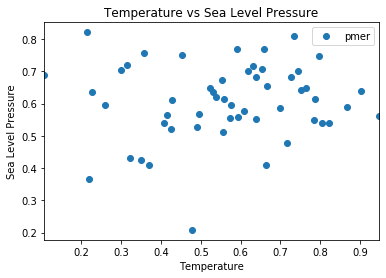

In [ ]:
df_final.plot(x='t', y='pmer', style='o')  
plt.title('Temperature vs Sea Level Pressure')  
plt.xlabel('Temperature')  
plt.ylabel('Sea Level Pressure')  
plt.show()

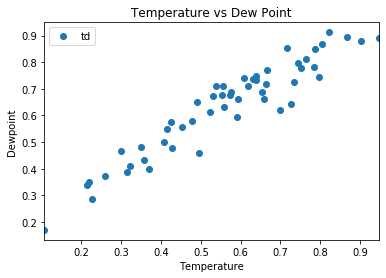

In [ ]:
df_final.plot(x='t', y='td', style='o')  
plt.title('Temperature vs Dew Point')  
plt.xlabel('Temperature')  
plt.ylabel('Dewpoint')  
plt.show()

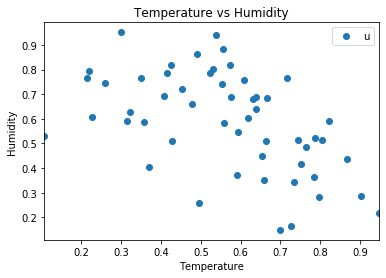

In [ ]:
df_final.plot(x='t', y='u', style='o')  
plt.title('Temperature vs Humidity')  
plt.xlabel('Temperature')  
plt.ylabel('Humidity')  
plt.show()

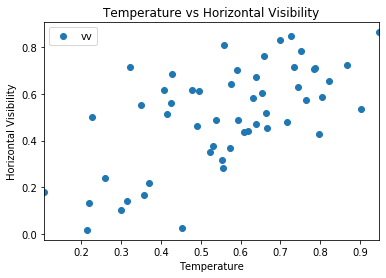

In [ ]:
df_final.plot(x='t', y='vv', style='o')  
plt.title('Temperature vs Horizontal Visibility')  
plt.xlabel('Temperature')  
plt.ylabel('Horizontal Visibility')  
plt.show()

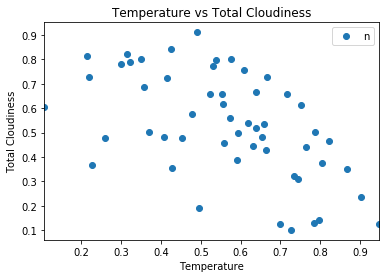

In [ ]:
df_final.plot(x='t', y='n', style='o')  
plt.title('Temperature vs Total Cloudiness')  
plt.xlabel('Temperature')  
plt.ylabel('Total Cloudiness')  
plt.show()

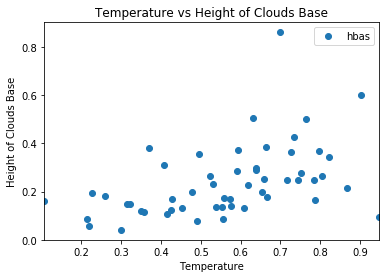

In [ ]:
df_final.plot(x='t', y='hbas', style='o')  
plt.title('Temperature vs Height of Clouds Base')  
plt.xlabel('Temperature')  
plt.ylabel('Height of Clouds Base')  
plt.show()

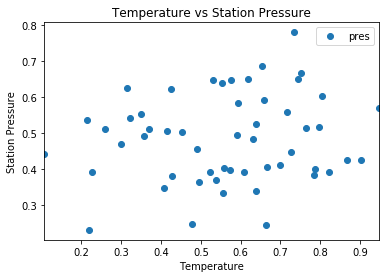

In [ ]:
df_final.plot(x='t', y='pres', style='o')  
plt.title('Temperature vs Station Pressure')  
plt.xlabel('Temperature')  
plt.ylabel('Station Pressure')  
plt.show()

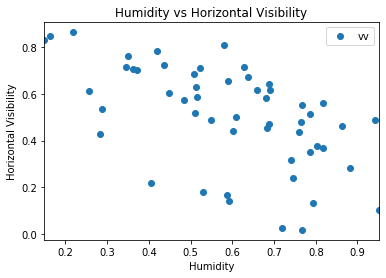

In [ ]:
df_final.plot(x='u', y='vv', style='o')  
plt.title('Humidity vs Horizontal Visibility')  
plt.xlabel('Humidity')  
plt.ylabel('Horizontal Visibility')  
plt.show()

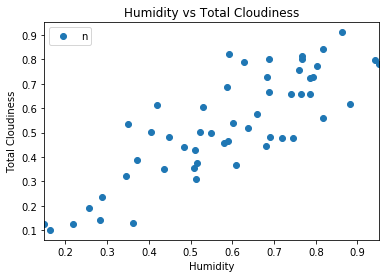

In [ ]:
df_final.plot(x='u', y='n', style='o')  
plt.title('Humidity vs Total Cloudiness')  
plt.xlabel('Humidity')  
plt.ylabel('Total Cloudiness')  
plt.show()

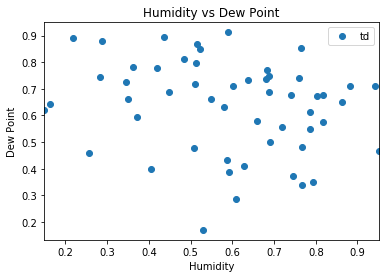

In [ ]:
df_final.plot(x='u', y='td', style='o')  
plt.title('Humidity vs Dew Point')  
plt.xlabel('Humidity')  
plt.ylabel('Dew Point')  
plt.show()

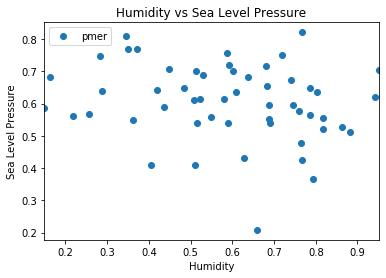

In [ ]:
df_final.plot(x='u', y='pmer', style='o')  
plt.title('Humidity vs Sea Level Pressure')  
plt.xlabel('Humidity')  
plt.ylabel('Sea Level Pressure')  
plt.show()

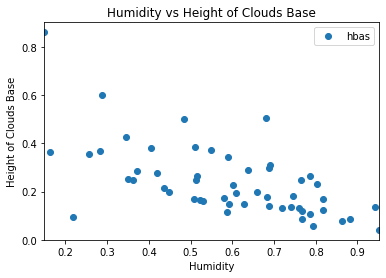

In [ ]:
df_final.plot(x='u', y='hbas', style='o')  
plt.title('Humidity vs Height of Clouds Base')  
plt.xlabel('Humidity')  
plt.ylabel('Height of Clouds Base')  
plt.show()

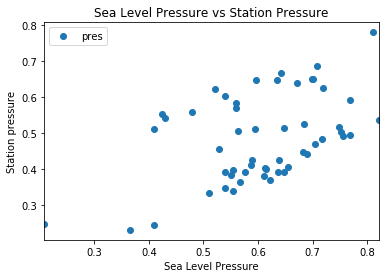

In [ ]:
df_final.plot(x='pmer', y='pres', style='o')  
plt.title('Sea Level Pressure vs Station Pressure')  
plt.xlabel('Sea Level Pressure')  
plt.ylabel('Station pressure')  
plt.show()

## ***Study the correlation between explanatory variables and variable to explain***

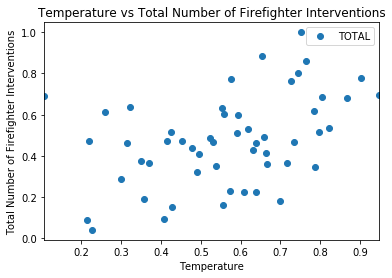

In [ ]:
df_final.plot(x='t', y='TOTAL', style='o')  
plt.title('Temperature vs Total Number of Firefighter Interventions')  
plt.xlabel('Temperature')  
plt.ylabel('Total Number of Firefighter Interventions')  
plt.show()

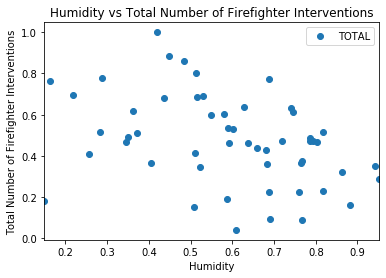

In [ ]:
df_final.plot(x='u', y='TOTAL', style='o')  
plt.title('Humidity vs Total Number of Firefighter Interventions')  
plt.xlabel('Humidity')  
plt.ylabel('Total Number of Firefighter Interventions')  
plt.show()

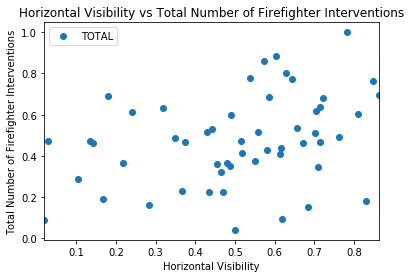

In [ ]:
df_final.plot(x='vv', y='TOTAL', style='o')  
plt.title('Horizontal Visibility vs Total Number of Firefighter Interventions')  
plt.xlabel('Horizontal Visibility')  
plt.ylabel('Total Number of Firefighter Interventions')  
plt.show()

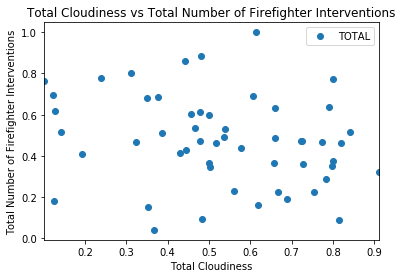

In [ ]:
df_final.plot(x='n', y='TOTAL', style='o')  
plt.title('Total Cloudiness vs Total Number of Firefighter Interventions')  
plt.xlabel('Total Cloudiness')  
plt.ylabel('Total Number of Firefighter Interventions')  
plt.show()

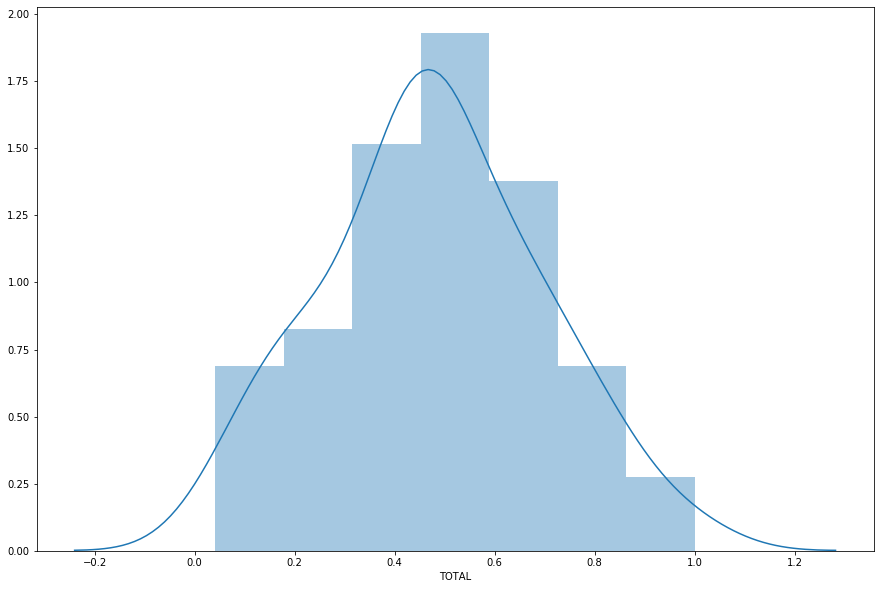

In [ ]:
# Checking avergae number of total firefighter interventions
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df_final['TOTAL'])

# **Univariate Regression**

## ***First Univariate Regression***

In [ ]:
X = df_final['t'].values.reshape(-1,1)
y = df_final['TOTAL'].values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Training the algorithm
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Intercept
print(regressor.intercept_)
# Slope
print(regressor.coef_)

[0.20373131]
[[0.49411887]]


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0.363702,0.557729
1,0.436872,0.439448
2,0.631994,0.476477
3,0.614778,0.331497
4,0.286944,0.351910
5,0.150646,0.414643
6,0.463415,0.519456
7,0.694405,0.671855
8,0.680775,0.631856
9,0.408178,0.448650


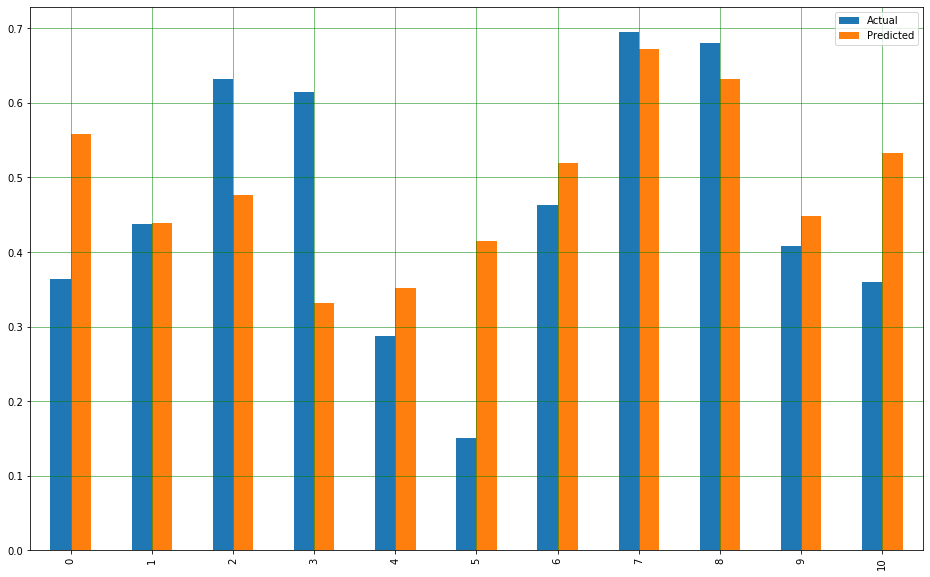

In [ ]:
# bar graph visualizing comparison result
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

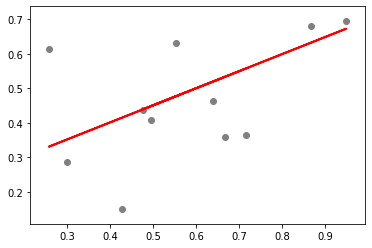

In [ ]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.11863684218450234
Mean Squared Error: 0.02304481818369223
Root Mean Squared Error: 0.15180519814450436


In [ ]:
df_final.describe()

,pmer,t,td,u,vv,n,hbas,pres,SAP,AVP,INC,OD,TOTAL
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.605943,0.563118,0.634823,0.589559,0.507492,0.530858,0.240982,0.485557,0.565447,0.445129,0.400943,0.259809,0.476611
std,0.118270,0.195540,0.173459,0.201157,0.217529,0.214621,0.149386,0.121270,0.222432,0.231982,0.219078,0.221245,0.217715
min,0.208179,0.105998,0.170724,0.148939,0.018516,0.101032,0.040850,0.231715,0.039106,0.000000,0.000000,0.008523,0.041607
25%,0.549868,0.425033,0.499840,0.447860,0.374911,0.386548,0.134636,0.393399,0.474860,0.299320,0.260417,0.083807,0.352941
50%,0.612716,0.575374,0.671618,0.602093,0.537014,0.517695,0.198555,0.493483,0.572067,0.469388,0.380208,0.211648,0.470588
75%,0.690183,0.716422,0.743310,0.759274,0.672414,0.721682,0.299534,0.569654,0.716201,0.585034,0.510417,0.410511,0.617647
max,0.821261,0.947390,0.912308,0.951271,0.862931,0.911075,0.860247,0.780397,1.000000,0.870748,1.000000,0.835227,1.000000


## ***Second Univariate Regression***

In [ ]:
X = df_final['u'].values.reshape(-1,1)
y = df_final['TOTAL'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0.363702,0.397189
1,0.436872,0.446209
2,0.631994,0.408118
3,0.614778,0.405928
4,0.286944,0.310387
5,0.150646,0.516778
6,0.463415,0.456414
7,0.694405,0.652031
8,0.680775,0.550094
9,0.408178,0.633871


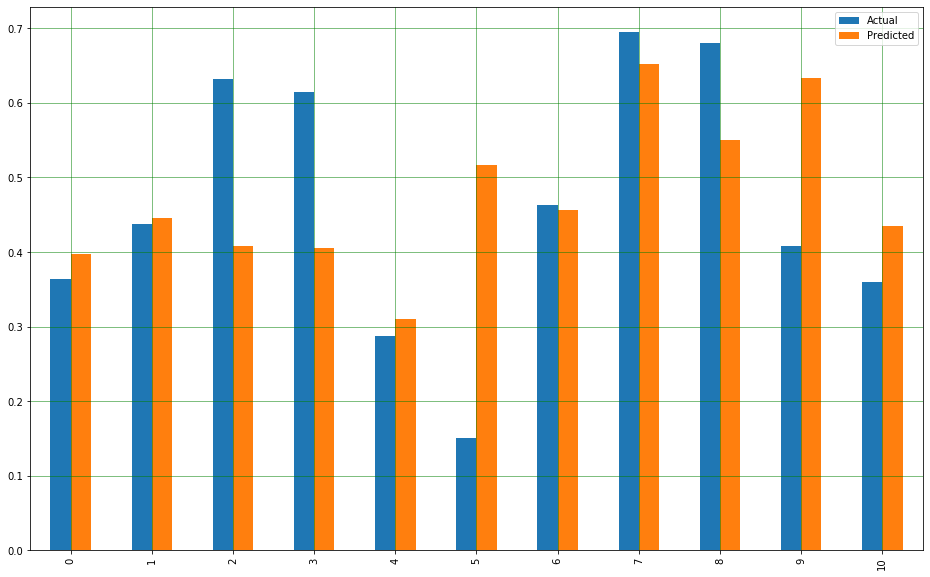

In [ ]:
# bar graph visualizing comparison result
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

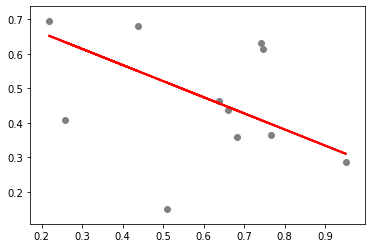

In [ ]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.12237321065949396
Mean Squared Error: 0.027733563595501345
Root Mean Squared Error: 0.1665339712956529


## ***Third Univariate Regression***

In [ ]:
X = df_final['vv'].values.reshape(-1,1)
y = df_final['TOTAL'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0.363702,0.471400
1,0.436872,0.523719
2,0.631994,0.408137
3,0.614778,0.378338
4,0.286944,0.325114
5,0.150646,0.550629
6,0.463415,0.546115
7,0.694405,0.620256
8,0.680775,0.565480
9,0.408178,0.523144


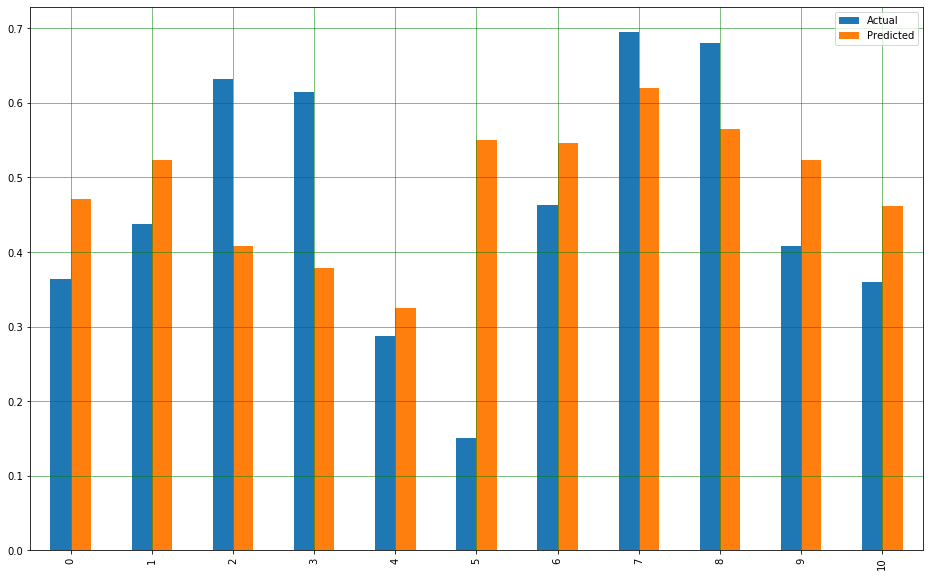

In [ ]:
# bar graph visualizing comparison result
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

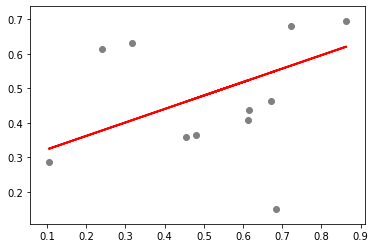

In [ ]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.14377888568591884
Mean Squared Error: 0.030522057540377193
Root Mean Squared Error: 0.17470563110666237


# **Multivariate Regression**

## ***First Multivariate Regression***

In [ ]:
X = df_final[['pmer','t','td','u','vv','n','hbas','pres']].values
y = df_final['TOTAL'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### ***Measuring the impact of the explanatory variables on the variable to be explained.***

In [ ]:
columns = ['pmer','t','td','u','vv','n','hbas','pres']
coeff_df = pd.DataFrame(regressor.coef_, columns, columns=['Coefficient'])  
coeff_df

,Coefficient
pmer,-0.419263
t,-0.605396
td,1.046659
u,-0.842218
vv,0.004377
n,0.070171
hbas,-0.415980
pres,0.734390


In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,0.363702,0.587117
1,0.436872,0.432919
2,0.631994,0.544605
3,0.614778,0.307917
4,0.286944,0.210731
5,0.150646,0.411531
6,0.463415,0.478213
7,0.694405,0.949249
8,0.680775,0.666248
9,0.408178,0.479246


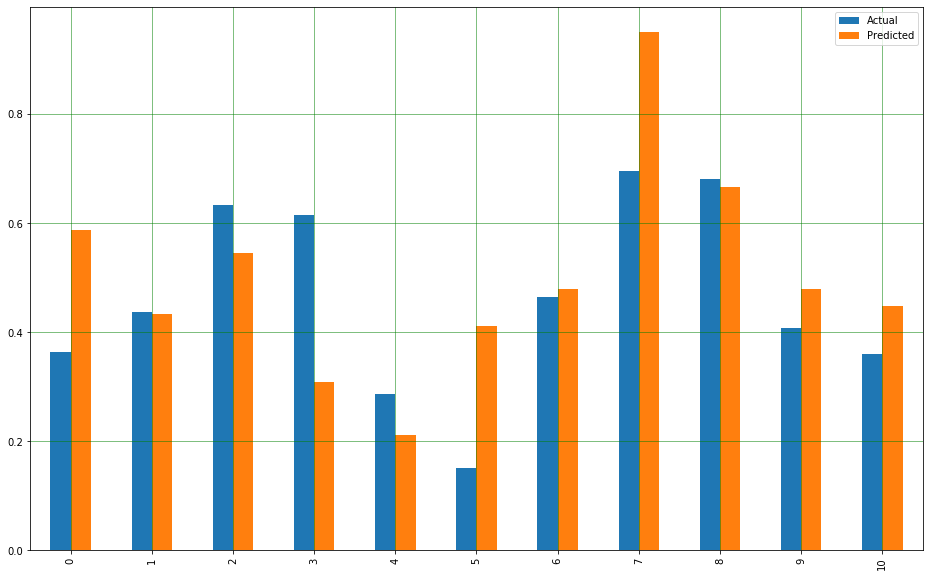

In [ ]:
# bar graph visualizing comparison result
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1274802867228774
Mean Squared Error: 0.02762074479299832
Root Mean Squared Error: 0.16619490002102447


## ***Second Multivariate Regression***


In [ ]:
X = df_final[['t','td','u','vv','n']].values
y = df_final['TOTAL'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
columns = ['t','td','u','vv','n']
coeff_df = pd.DataFrame(regressor.coef_, columns, columns=['Coefficient'])  
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [ ]:
coeff_df

,Coefficient
t,-2.231072
td,2.645941
u,-1.393876
vv,0.066334
n,0.398129


In [ ]:
df

,Actual,Predicted
0,0.363702,0.519828
1,0.436872,0.450131
2,0.631994,0.438411
3,0.614778,0.210139
4,0.286944,0.187145
5,0.150646,0.422334
6,0.463415,0.507188
7,0.694405,0.678186
8,0.680775,0.645168
9,0.408178,0.498261


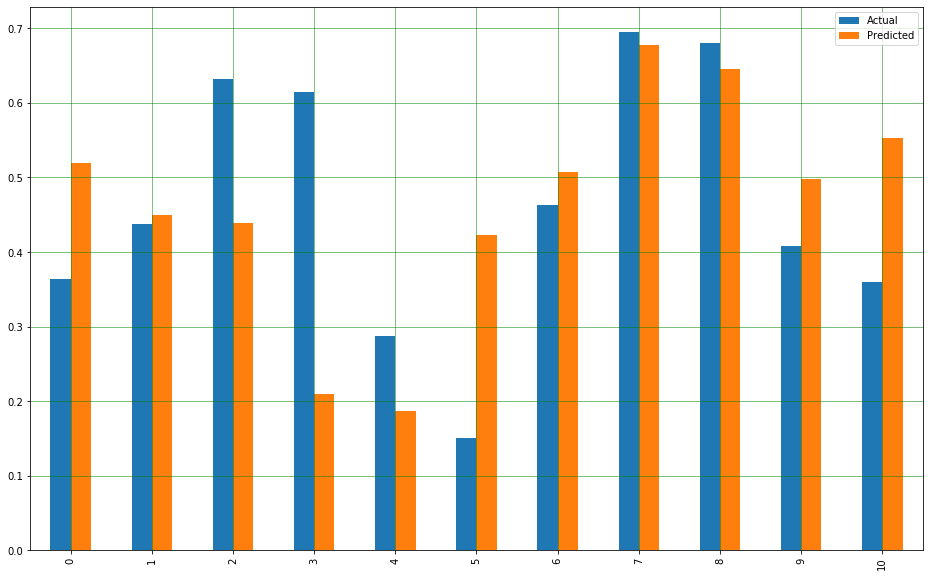

In [ ]:
# bar graph visualizing comparison result
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1379381327273092
Mean Squared Error: 0.03256068765078998
Root Mean Squared Error: 0.1804458025302611


## ***Third Multivariate Regression***

In [ ]:
X = df_final[['u','vv','n']].values
y = df_final['TOTAL'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
columns = ['u','vv','n']
coeff_df = pd.DataFrame(regressor.coef_, columns, columns=['Coefficient'])  
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [ ]:
coeff_df

,Coefficient
u,-0.627660
vv,0.260398
n,0.342352


In [ ]:
df

,Actual,Predicted
0,0.363702,0.402157
1,0.436872,0.475633
2,0.631994,0.375548
3,0.614778,0.290162
4,0.286944,0.230243
5,0.150646,0.512400
6,0.463415,0.484296
7,0.694405,0.662497
8,0.680775,0.566119
9,0.408178,0.596775


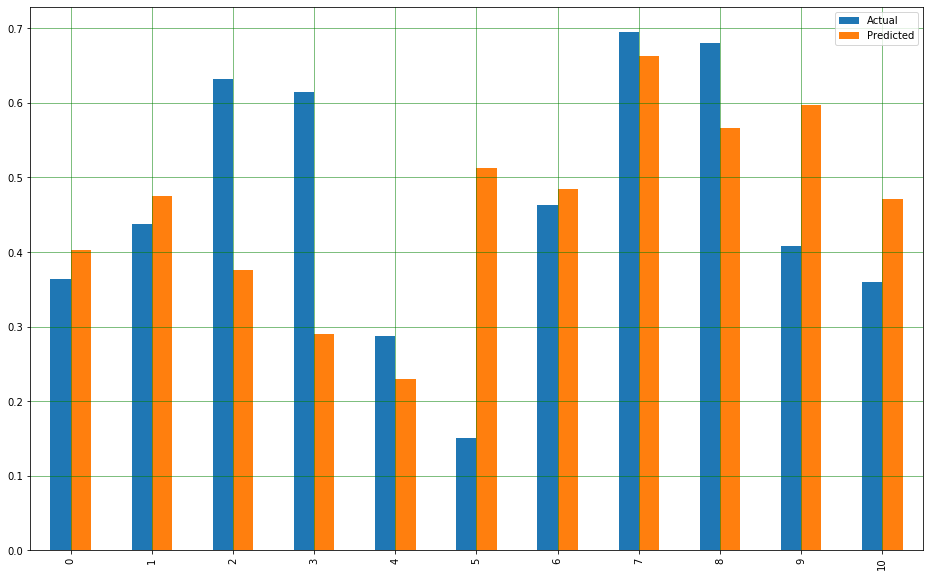

In [ ]:
# bar graph visualizing comparison result
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.14031095211253933
Mean Squared Error: 0.03369213259933038
Root Mean Squared Error: 0.18355416802494673


# **Using a Decision Tree to Predict the Number of Interventions** 

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Split dataset in features and target variable
feature_cols = ['t','td','u','vv','n']
X = df_final[feature_cols] # Features
y = df_final.TOTAL # Target Variable

In [ ]:
# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeRegressor()

# Train Decision Tree classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
30,0.494261,0.344333
2,0.150646,0.408178
51,1.000000,0.344333
32,0.436872,0.473458
31,0.463415,0.429699
46,0.378049,0.095409
34,0.474892,0.095409
39,0.529412,0.223099
45,0.515782,0.095409
19,0.535151,0.429699


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.26076040172166437
Mean Squared Error: 0.11048857421332256
Root Mean Squared Error: 0.3323982163209101


# **Use other supervised learning techniques to reduce the mean square prediction error**

**Techniques Used** <br>
***1 - Linear Regression (before Decision Tree)*** <br>
***2 - Decision Tree (as specified in requirement 8)*** <br>
***3 - Variable Selection*** <br>
***4 - Random Forest*** <br>


## ***Using the technique of different variable selection***

In [ ]:
feature_cols = ['pmer','t','td','u','vv','n']
X = df_final[feature_cols] 
y = df_final.TOTAL 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
clf = DecisionTreeRegressor()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test) 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.17826398852223818
Mean Squared Error: 0.05035518073975577
Root Mean Squared Error: 0.22439960057842298


In [ ]:
feature_cols = ['pmer','t','td','u','vv','n','pres']
X = df_final[feature_cols] 
y = df_final.TOTAL 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
clf = DecisionTreeRegressor()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test) 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.16965566714490682
Mean Squared Error: 0.04553223334685033
Root Mean Squared Error: 0.21338283283069032


In [ ]:
feature_cols = ['pmer','t','td','u','vv','n','hbas','pres']
X = df_final[feature_cols] 
y = df_final.TOTAL 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
clf = DecisionTreeRegressor()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test) 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.14607245337159258
Mean Squared Error: 0.03506869469277023
Root Mean Squared Error: 0.1872663736306394


## ***Using a Random Forest Regressor***



In [ ]:
from sklearn.ensemble import RandomForestRegressor

feature_cols = ['pmer','t','td','u','vv','n','hbas','pres']
X = df_final[feature_cols] 
y = df_final.TOTAL 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.11122342506847525
Mean Squared Error: 0.018836652320711893
Root Mean Squared Error: 0.1372466841884054


### ***Increasing number of estimators with Random Forest Regression***

In [ ]:
feature_cols = ['pmer','t','td','u','vv','n','hbas','pres']
X = df_final[feature_cols] 
y = df_final.TOTAL 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.11014698382679128
Mean Squared Error: 0.018164736298316907
Root Mean Squared Error: 0.13477661628901694


In [ ]:
feature_cols = ['pmer','t','td','u','vv','n','hbas','pres']
X = df_final[feature_cols] 
y = df_final.TOTAL 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.10726123320725182
Mean Squared Error: 0.017548111483140064
Root Mean Squared Error: 0.1324692850555934
